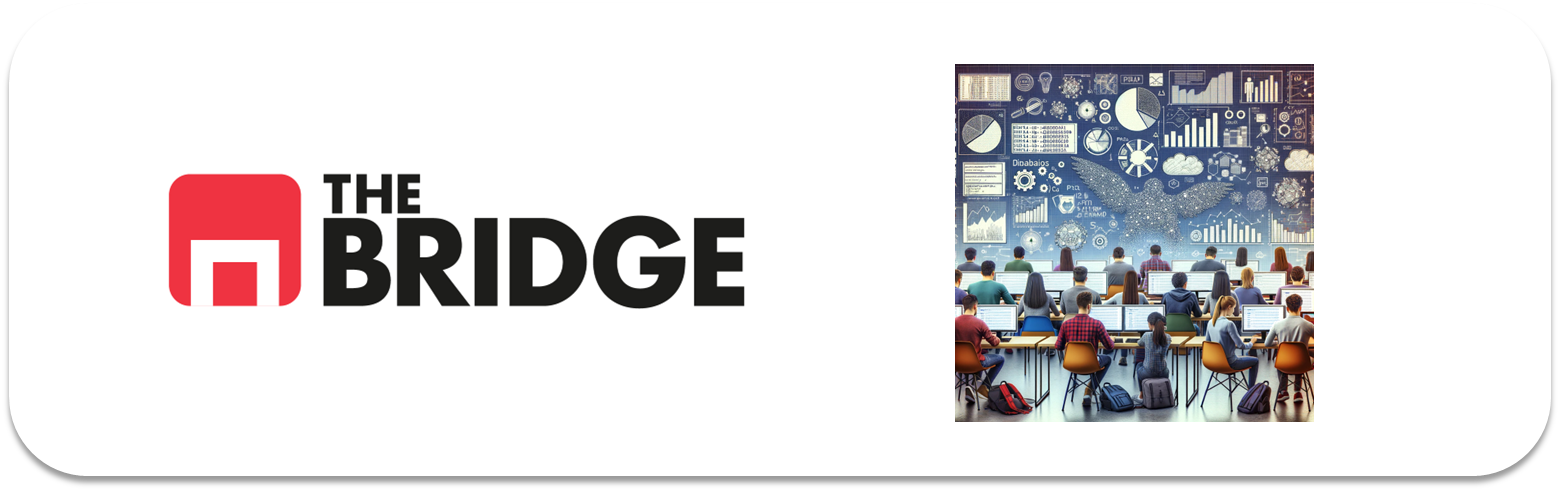

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [87]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from pprint import pprint
from sklearn.metrics import roc_curve, auc

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



1. Carga el dataset del Titanic. 

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")

In [3]:
df = df_titanic.copy()

In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.

In [6]:
df.drop(columns=["embarked","adult_male","alive","class","deck"],inplace=True)

In [7]:
df

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,Southampton,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,Cherbourg,True


In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   who          891 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


In [10]:
df.drop_duplicates(inplace=True)

3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.

In [11]:
df.rename(columns = {'survived': 'target'}, inplace=True)

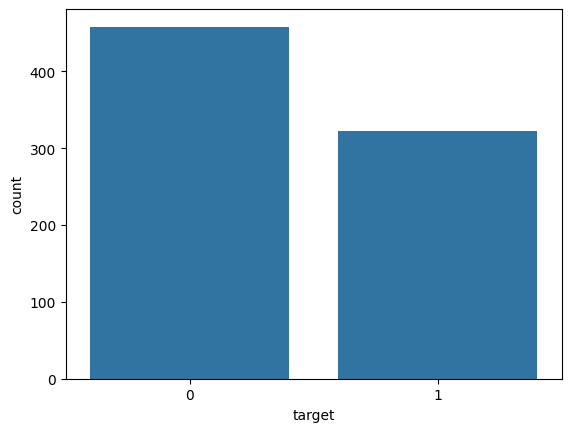

In [12]:
sns.countplot(data=df, x='target');

In [13]:
prop = df['target'].value_counts(normalize=True)
prop

target
0    0.587179
1    0.412821
Name: proportion, dtype: float64

- El 1 (True), representa que se sobrevive, el 0 (False)que no.
- es predominante el no sobrevivir

<Axes: xlabel='target', ylabel='Count'>

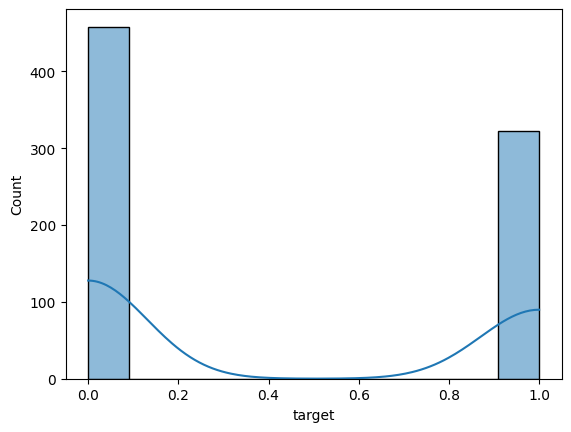

In [14]:
sns.histplot(df["target"], kde= True) #no vemos mcho

4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.


In [15]:
df["embark_town_strat"] = df["embark_town"].fillna(df["embark_town"].mode()[0]) #sino no puedo hacer split, me creo una nueva que no será feature

In [16]:
train_set, test_set = train_test_split(df, test_size= 0.2, stratify= df["embark_town_strat"], random_state= 42)

In [17]:
train_set["embark_town_strat"].value_counts(normalize = True)

embark_town_strat
Southampton    0.727564
Cherbourg      0.198718
Queenstown     0.073718
Name: proportion, dtype: float64

In [18]:
test_set["embark_town_strat"].value_counts(normalize = True)

embark_town_strat
Southampton    0.724359
Cherbourg      0.198718
Queenstown     0.076923
Name: proportion, dtype: float64

In [19]:
train_set = train_set.drop(columns=["embark_town_strat"])
test_set = test_set.drop(columns=["embark_town_strat"])

5. Construye las parejas X,y de train y test.

In [20]:
target = "target"

X_train = train_set.drop(columns=[target])
y_train = train_set[target]

X_test = test_set.drop(columns=[target])
y_test = test_set[target]

6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.


In [21]:
X_train

,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
679,1,male,36.0,0,1,512.3292,man,Cherbourg,False
17,2,male,NaN,0,0,13.0000,man,Southampton,True
74,3,male,32.0,0,0,56.4958,man,Southampton,True
857,1,male,51.0,0,0,26.5500,man,Southampton,True
96,1,male,71.0,0,0,34.6542,man,Cherbourg,True
...,...,...,...,...,...,...,...,...,...
713,3,male,29.0,0,0,9.4833,man,Southampton,True
118,1,male,24.0,0,1,247.5208,man,Cherbourg,False
611,3,male,NaN,0,0,7.0500,man,Southampton,True
442,3,male,25.0,1,0,7.7750,man,Southampton,False


In [22]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns

In [23]:
num_cols

Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [24]:
#  numéricas
train_medias = X_train[num_cols].mean()
# categóricas
train_modas = X_train[cat_cols].mode().iloc[0]

In [25]:
#imputación numérica
X_train[num_cols] = X_train[num_cols].fillna(train_medias)
#imputacion categóric
X_train[cat_cols] = X_train[cat_cols].fillna(train_modas)

In [26]:
#hago el test ya
X_test[num_cols] = X_test[num_cols].fillna(train_medias)
X_test[cat_cols] = X_test[cat_cols].fillna(train_modas)

In [27]:
#no lo uso porque no se muy bien que hace
#from sklearn.impute import SimpleImputer #HERRAMIENTA PARA IMPUTAR
#categorical_imputer = SimpleImputer(strategy="most_frequent")


7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.


array([[<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

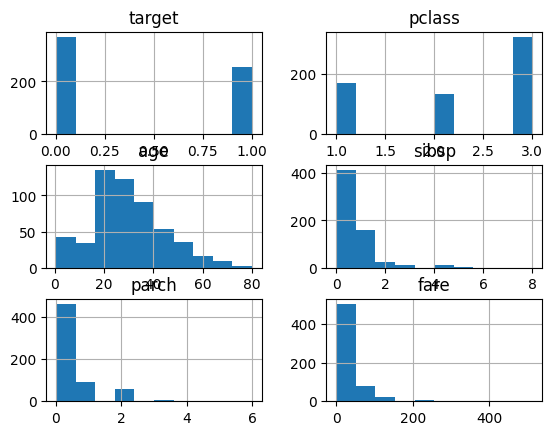

In [28]:
train_set.hist()

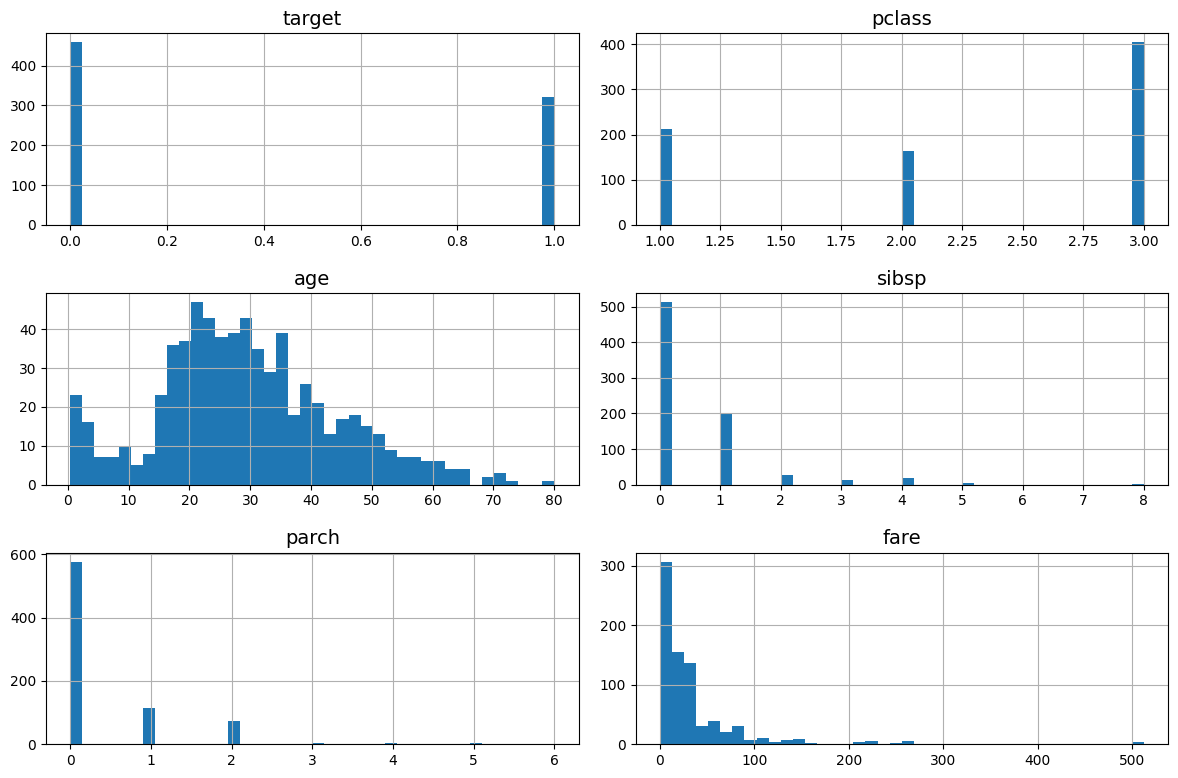

In [29]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=40, figsize=(12, 8))
plt.tight_layout()
plt.show()

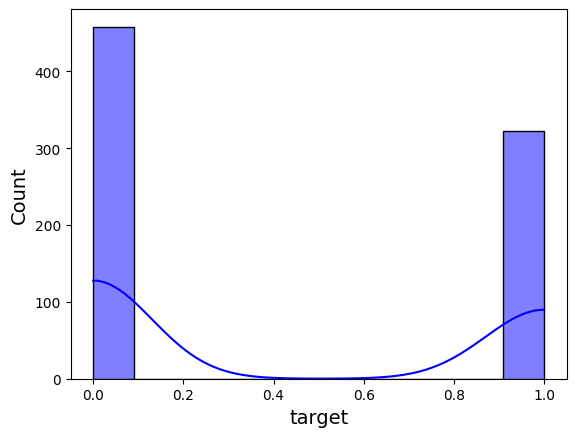

In [30]:
sns.histplot(df['target'], color='Blue', kde = True)
plt.show()

In [31]:
df.corr(numeric_only= True)

,target,pclass,age,sibsp,parch,fare,alone
target,1.000000,-0.336244,-0.084985,-0.037597,0.069669,0.246669,-0.175864
pclass,-0.336244,1.000000,-0.366477,0.086788,0.038975,-0.552440,0.112711
age,-0.084985,-0.366477,1.000000,-0.314239,-0.193819,0.093877,0.207565
sibsp,-0.037597,0.086788,-0.314239,1.000000,0.380596,0.134127,-0.608756
parch,0.069669,0.038975,-0.193819,0.380596,1.000000,0.191055,-0.570338
fare,0.246669,-0.552440,0.093877,0.134127,0.191055,1.000000,-0.245279
alone,-0.175864,0.112711,0.207565,-0.608756,-0.570338,-0.245279,1.000000


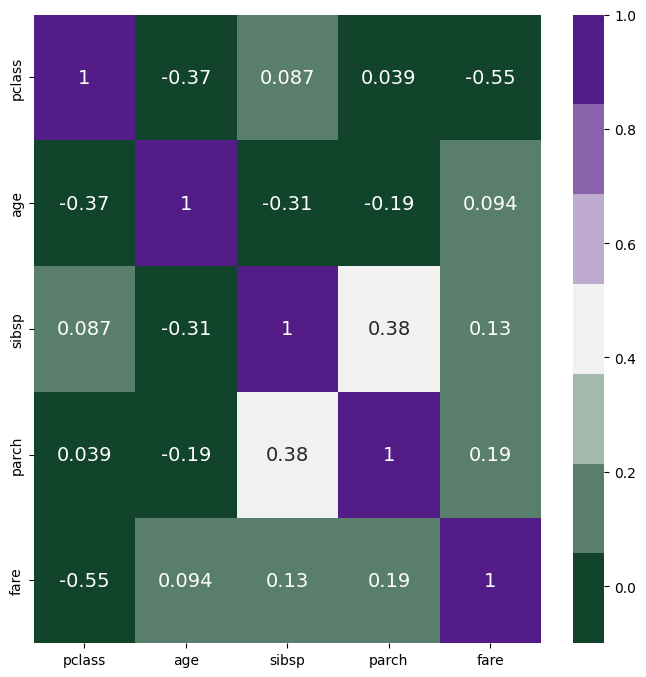

In [32]:
#Correlaciones con la targeT

plt.figure(figsize=(7,7))
sns.heatmap(df[num_cols].corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);
plt.tight_layout()

In [33]:
corr = train_set.corr(numeric_only = True)
serie_corr = np.abs(corr[target]).sort_values(ascending=False)
serie_corr

target    1.000000
pclass    0.304107
fare      0.236226
alone     0.187569
age       0.108938
parch     0.095901
sibsp     0.023297
Name: target, dtype: float64

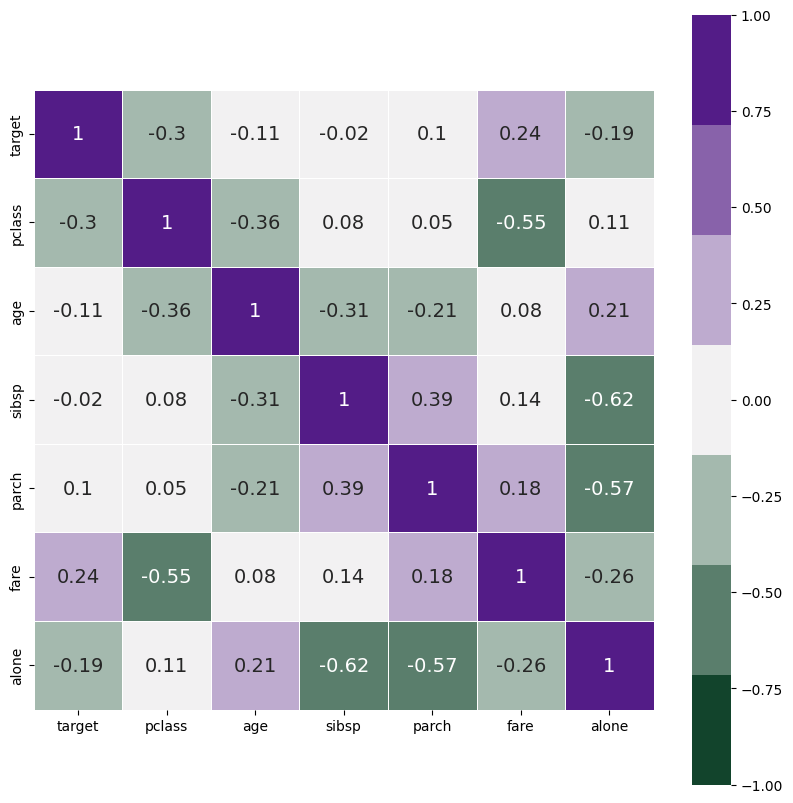

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(train_set.corr(numeric_only=True), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

In [35]:
columnas = train_set.columns.drop("target")
features = columnas
columnas

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'who', 'embark_town',
       'alone'],
      dtype='object')

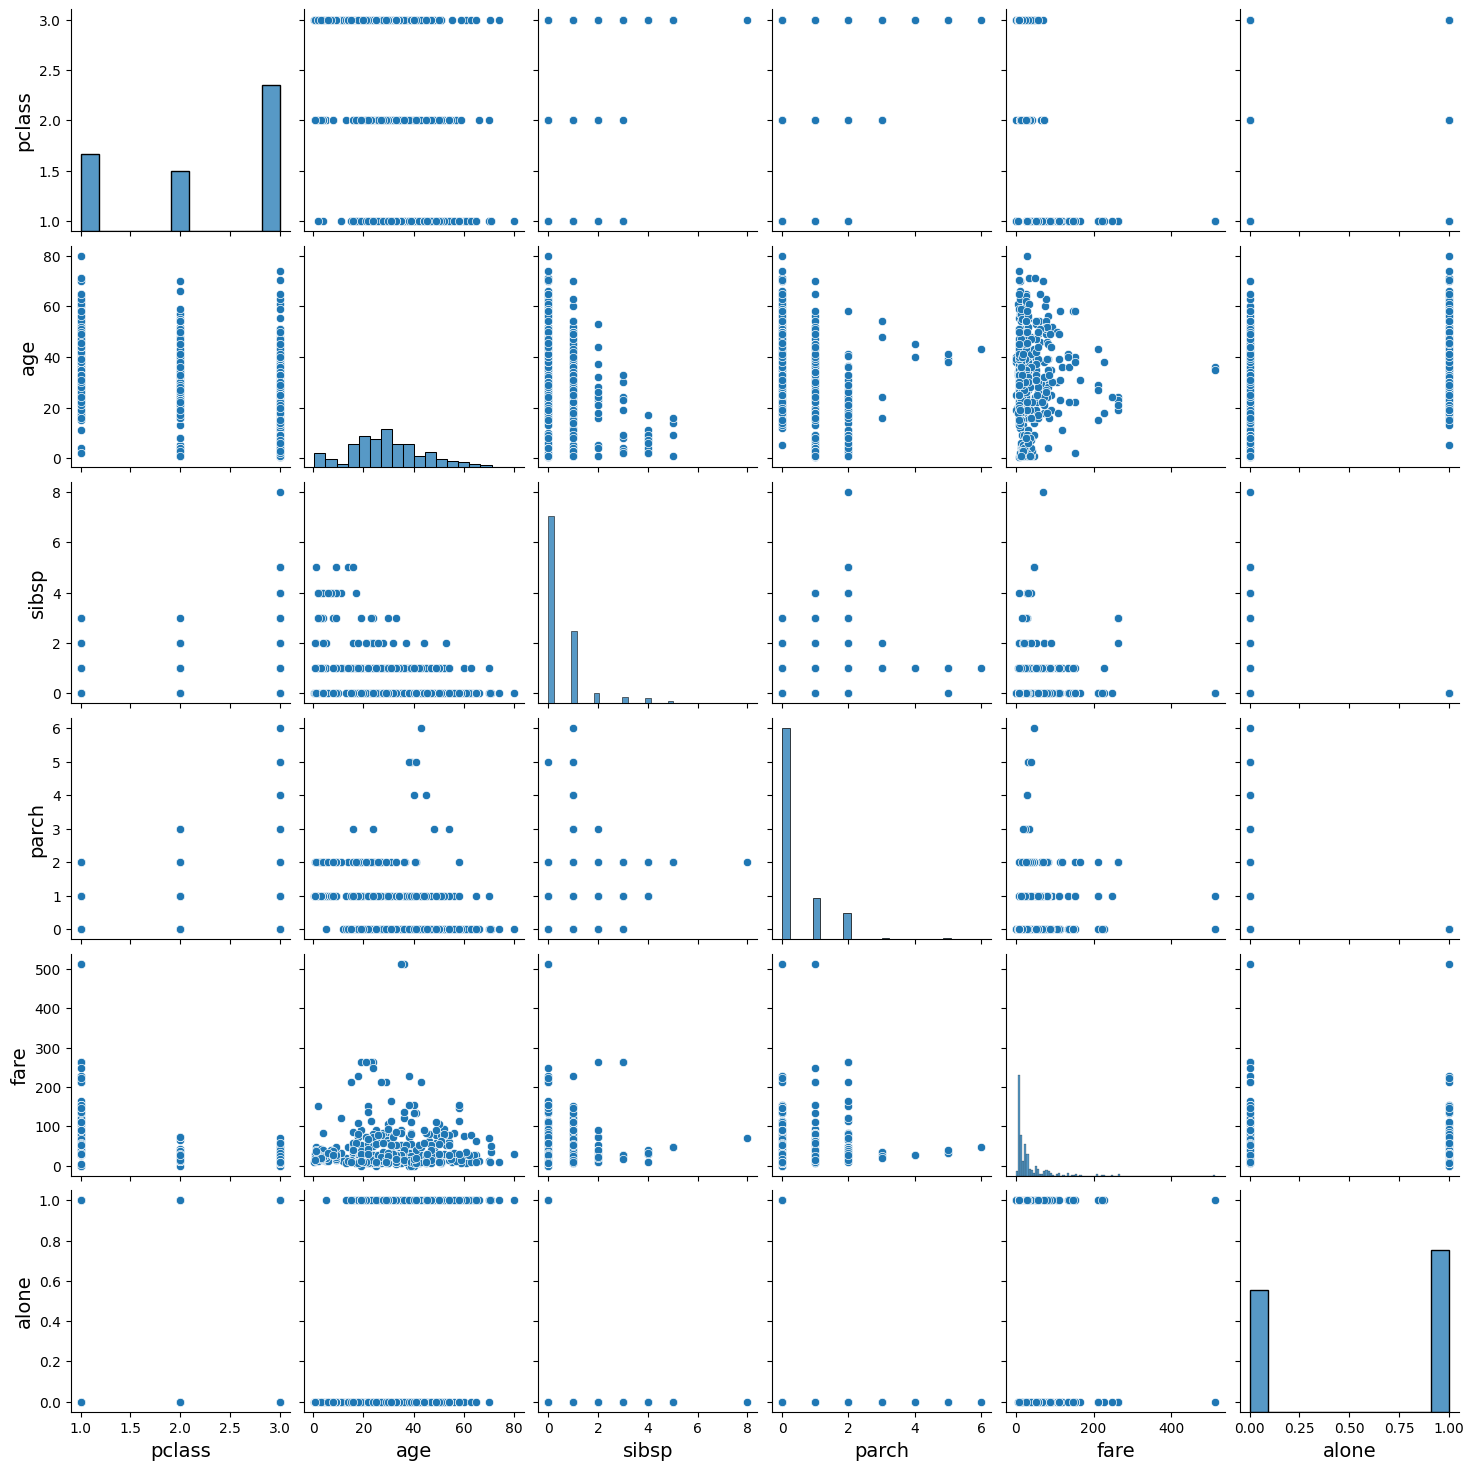

In [36]:
sns.pairplot(train_set[columnas]);

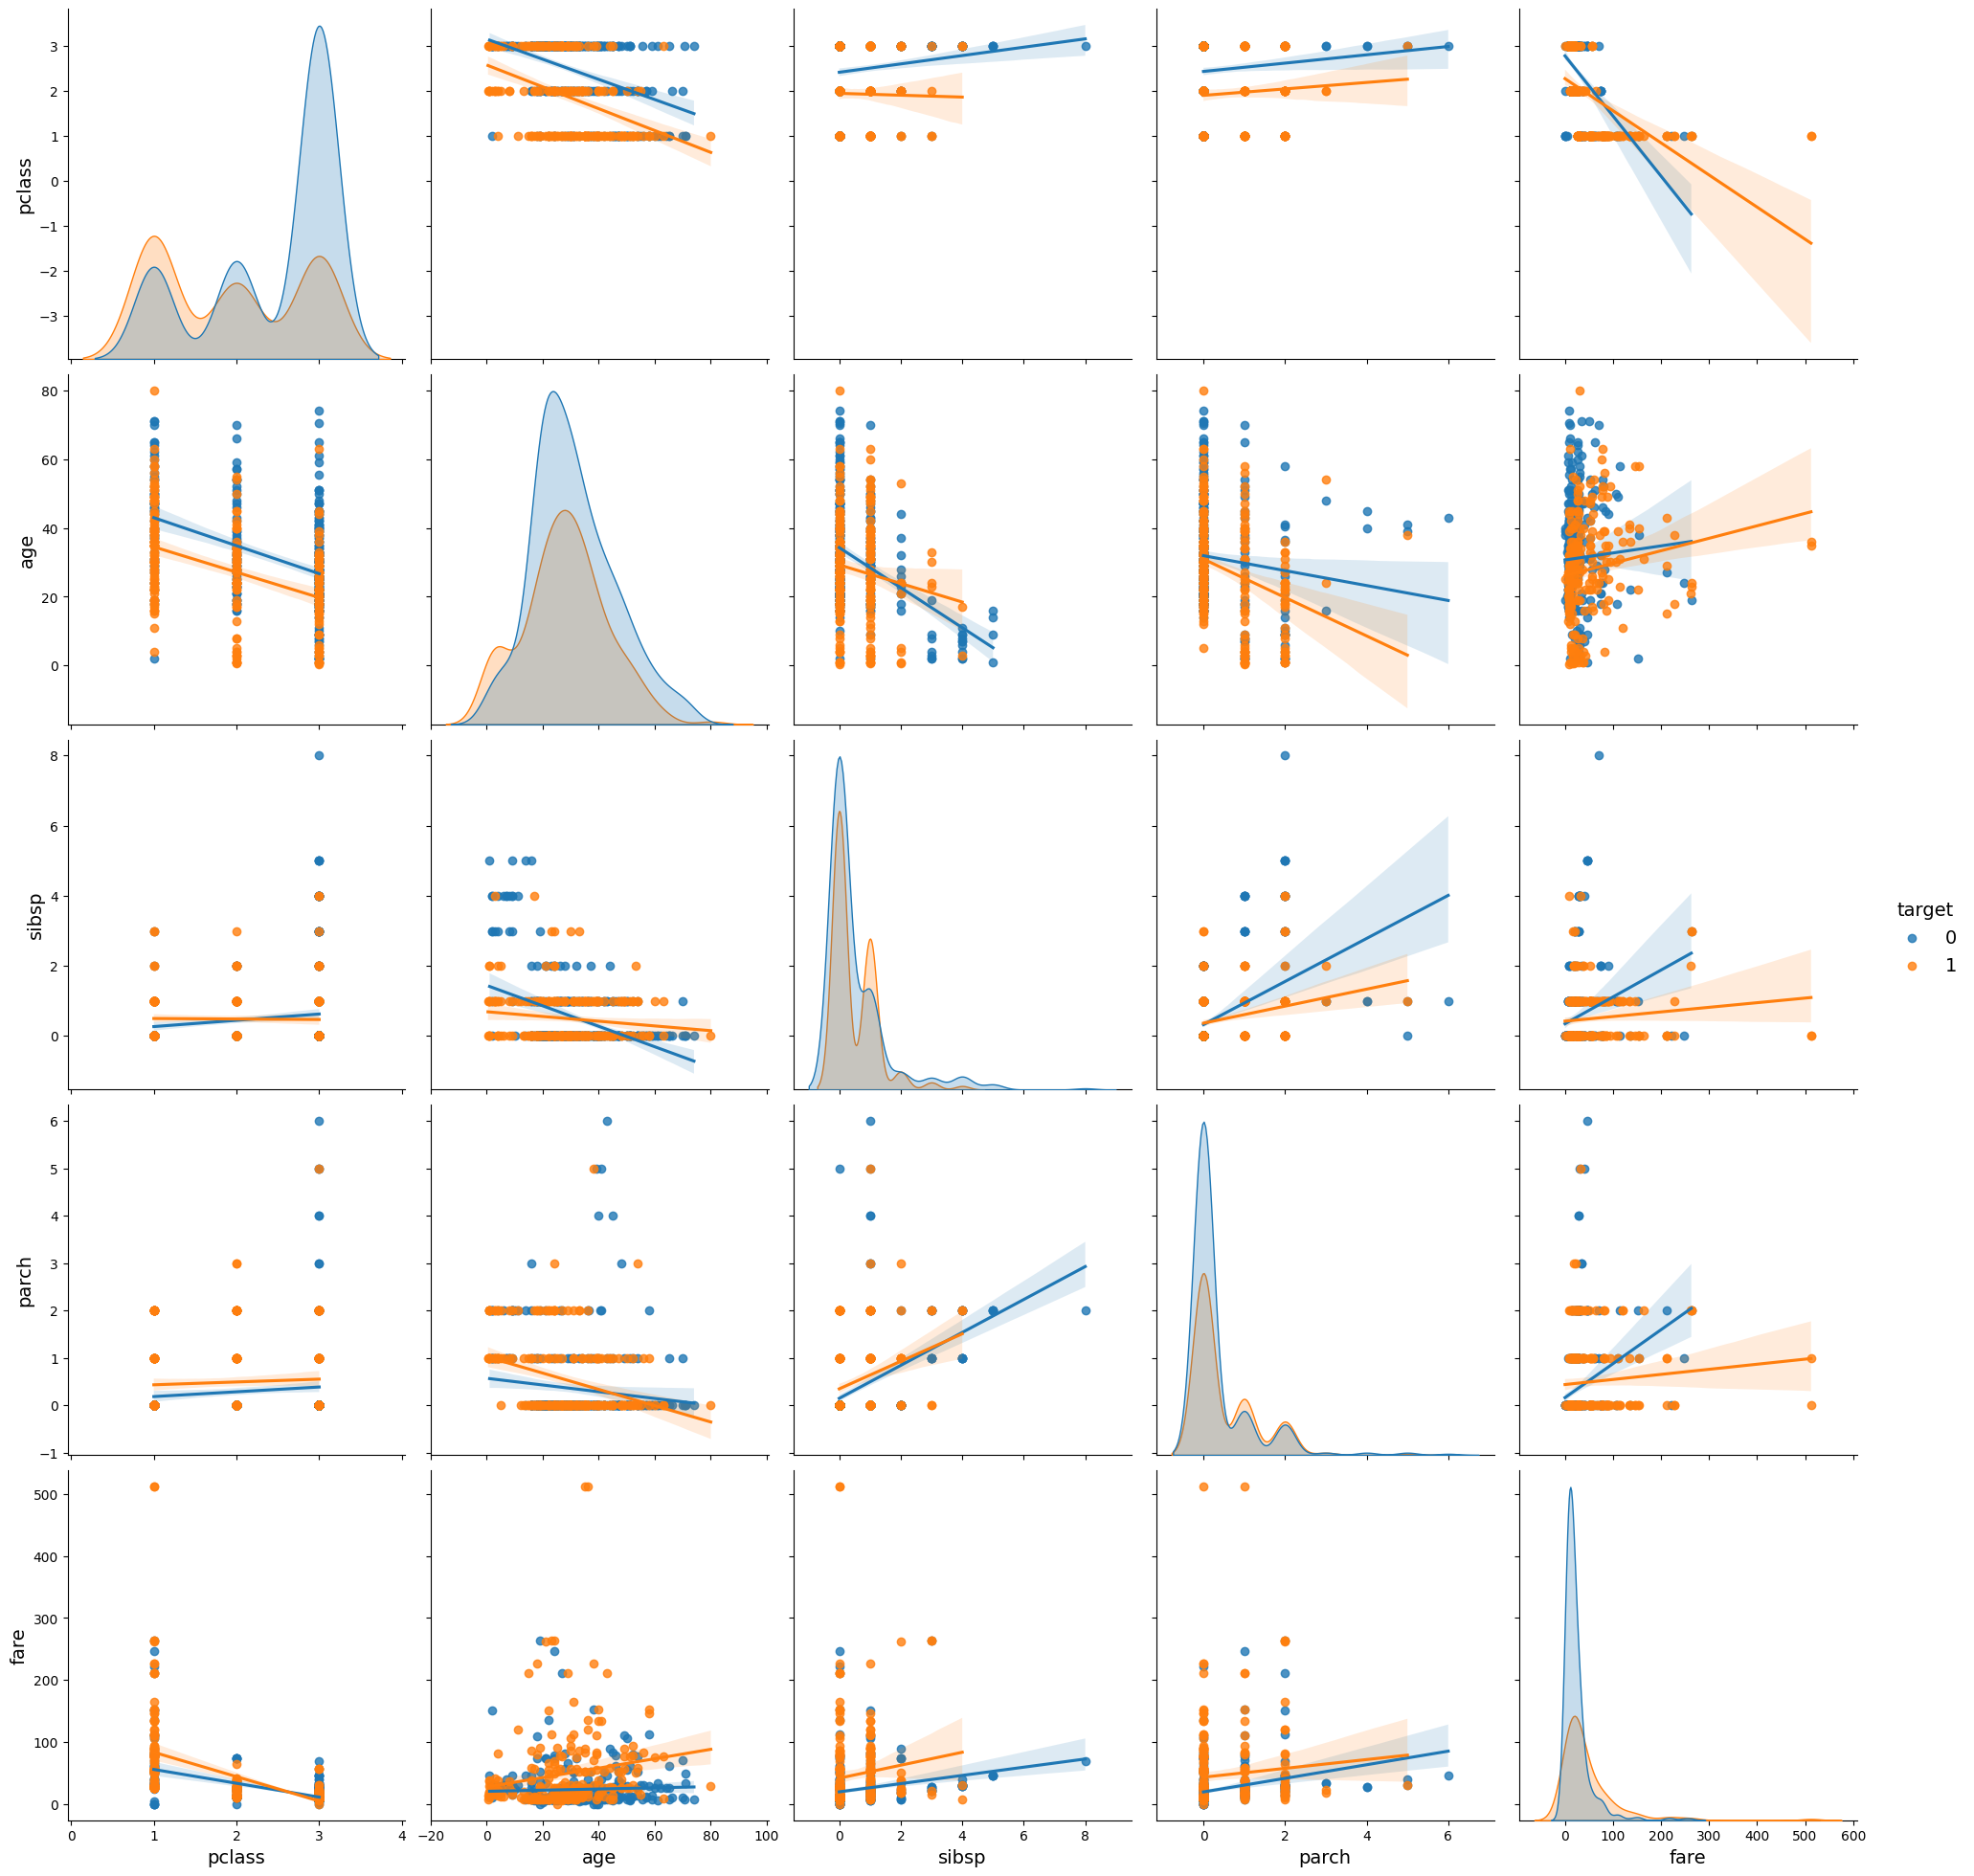

In [37]:
sns.pairplot(train_set,
            hue='target',
            height=4,
            vars=num_cols,
            kind='reg'); # "reg" de regresión lineal

In [38]:
train_set[num_cols].corr(numeric_only=True) #colinealidad

,pclass,age,sibsp,parch,fare
pclass,1.000000,-0.364316,0.080451,0.049546,-0.547310
age,-0.364316,1.000000,-0.313384,-0.208486,0.078211
sibsp,0.080451,-0.313384,1.000000,0.390978,0.139689
parch,0.049546,-0.208486,0.390978,1.000000,0.175869
fare,-0.547310,0.078211,0.139689,0.175869,1.000000


In [39]:
criterio_col = 0.7
excluidas = []
corr_numeric = train_set[num_cols].corr(numeric_only = True)

for col in num_cols:
    print(f"Comprobando colinealidad de {col}")
    if col not in excluidas:
        for col_2, valor_corr in corr_numeric[col].items():
            print(f"\tComprobando {col} con {col_2}")
            if col != col_2 and col_2 in num_cols:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"\t\t--> {col} correla con {col_2} al {valor_corr:0.4f}, EXCLUIMOS {col_2} <--")
                    excluidas.append(col_2)
                else:
                    print(f"\t\t{col} correla con {col_2} al {valor_corr:0.4f}, mantenemos {col_2}")
            elif col == col_2:
                print("\t\tSon la misma variable, no comprobamos")
    
    elif col in excluidas:
        print(f"\tLa columna {col} ya ha sido excluida")

excluidas = list(set(excluidas))
print("\nLas variables a excluir son", excluidas)

Comprobando colinealidad de pclass
	Comprobando pclass con pclass
		Son la misma variable, no comprobamos
	Comprobando pclass con age
		pclass correla con age al -0.3643, mantenemos age
	Comprobando pclass con sibsp
		pclass correla con sibsp al 0.0805, mantenemos sibsp
	Comprobando pclass con parch
		pclass correla con parch al 0.0495, mantenemos parch
	Comprobando pclass con fare
		pclass correla con fare al -0.5473, mantenemos fare
Comprobando colinealidad de age
	Comprobando age con pclass
		age correla con pclass al -0.3643, mantenemos pclass
	Comprobando age con age
		Son la misma variable, no comprobamos
	Comprobando age con sibsp
		age correla con sibsp al -0.3134, mantenemos sibsp
	Comprobando age con parch
		age correla con parch al -0.2085, mantenemos parch
	Comprobando age con fare
		age correla con fare al 0.0782, mantenemos fare
Comprobando colinealidad de sibsp
	Comprobando sibsp con pclass
		sibsp correla con pclass al 0.0805, mantenemos pclass
	Comprobando sibsp con ag

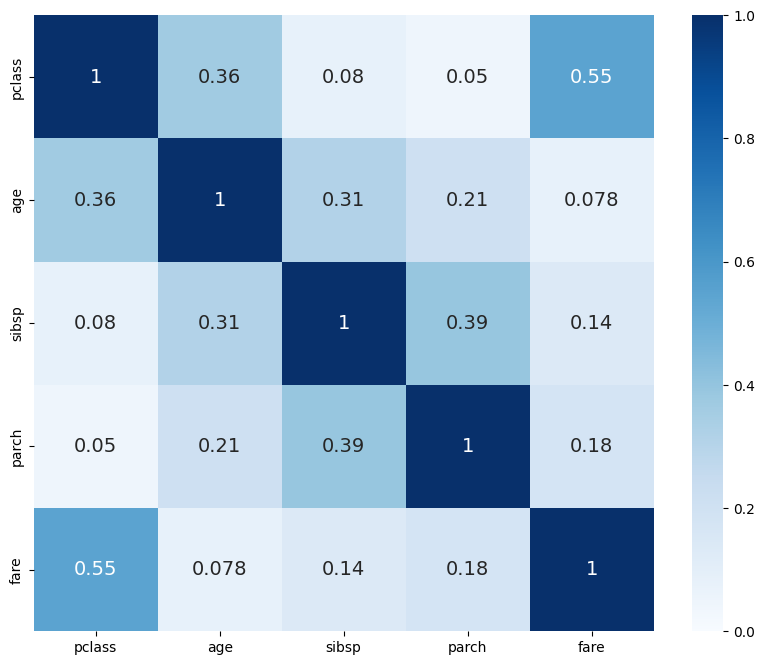

In [40]:
plt.figure(figsize = (10,8))
sns.heatmap(np.abs(train_set[num_cols].corr(numeric_only = True)), annot = True, cmap = "Blues", vmin=0, vmax=1);

8. Trata las variables para que funcionen lo mejor posible en el modelo.

In [41]:
train_set

,target,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
679,1,1,male,36.0,0,1,512.3292,man,Cherbourg,False
17,1,2,male,NaN,0,0,13.0000,man,Southampton,True
74,1,3,male,32.0,0,0,56.4958,man,Southampton,True
857,1,1,male,51.0,0,0,26.5500,man,Southampton,True
96,0,1,male,71.0,0,0,34.6542,man,Cherbourg,True
...,...,...,...,...,...,...,...,...,...,...
713,0,3,male,29.0,0,0,9.4833,man,Southampton,True
118,0,1,male,24.0,0,1,247.5208,man,Cherbourg,False
611,0,3,male,NaN,0,0,7.0500,man,Southampton,True
442,0,3,male,25.0,1,0,7.7750,man,Southampton,False


In [42]:
train_set.columns

Index(['target', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'who',
       'embark_town', 'alone'],
      dtype='object')

In [43]:
cat_cols = ["pclass", "sex", "sibsp", "parch", "who", "alone", "embark_town"]

for col in cat_cols:
    train_set[col] = train_set[col].astype("category")

In [44]:
columnas

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'who', 'embark_town',
       'alone'],
      dtype='object')

In [45]:
features = columnas

In [46]:
X_train

,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
679,1,male,36.000000,0,1,512.3292,man,Cherbourg,False
17,2,male,29.840406,0,0,13.0000,man,Southampton,True
74,3,male,32.000000,0,0,56.4958,man,Southampton,True
857,1,male,51.000000,0,0,26.5500,man,Southampton,True
96,1,male,71.000000,0,0,34.6542,man,Cherbourg,True
...,...,...,...,...,...,...,...,...,...
713,3,male,29.000000,0,0,9.4833,man,Southampton,True
118,1,male,24.000000,0,1,247.5208,man,Cherbourg,False
611,3,male,29.840406,0,0,7.0500,man,Southampton,True
442,3,male,25.000000,1,0,7.7750,man,Southampton,False


In [47]:
#ordeno a mano la importancia porque no lo hice antes
orden_manual = ["pclass", "fare", "alone", "age", "parch", "sibsp","sex","who","embark_town"]
X_train = X_train[orden_manual]
X_test = X_test[orden_manual]

In [48]:
X_train

,pclass,fare,alone,age,parch,sibsp,sex,who,embark_town
679,1,512.3292,False,36.000000,1,0,male,man,Cherbourg
17,2,13.0000,True,29.840406,0,0,male,man,Southampton
74,3,56.4958,True,32.000000,0,0,male,man,Southampton
857,1,26.5500,True,51.000000,0,0,male,man,Southampton
96,1,34.6542,True,71.000000,0,0,male,man,Cherbourg
...,...,...,...,...,...,...,...,...,...
713,3,9.4833,True,29.000000,0,0,male,man,Southampton
118,1,247.5208,False,24.000000,1,0,male,man,Cherbourg
611,3,7.0500,True,29.840406,0,0,male,man,Southampton
442,3,7.7750,False,25.000000,0,1,male,man,Southampton


In [48]:
#TRATAMIENTO CATEGÓRICAS:

In [49]:
cat_features = ["pclass", "sex", "sibsp", "parch", "who", "alone", "embark_town"]
num_features = num_features = ["age", "fare"]

In [50]:
num_features

['age', 'fare']

In [51]:
cat_features

['pclass', 'sex', 'sibsp', 'parch', 'who', 'alone', 'embark_town']

In [52]:
X_train = pd.get_dummies(X_train, columns = cat_features, dtype = int)

In [53]:
X_train

,fare,age,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,...,parch_5,parch_6,who_child,who_man,who_woman,alone_False,alone_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
679,512.3292,36.000000,1,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0,0
17,13.0000,29.840406,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
74,56.4958,32.000000,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
857,26.5500,51.000000,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
96,34.6542,71.000000,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,9.4833,29.000000,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
118,247.5208,24.000000,1,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0,0
611,7.0500,29.840406,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
442,7.7750,25.000000,0,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [54]:
#lo mismo en TEST, tengo que poner el reindex segunt train para que me lo ordene bien
X_test = pd.get_dummies(X_test, columns=cat_features, dtype=int)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [55]:
#TRATAMIENTO NUMERICAS:

In [55]:
X_train["age"] = np.log1p(X_train["age"])
X_train["fare"] = np.log1p(X_train["fare"])

X_test["age"] = np.log1p(X_test["age"])
X_test["fare"] = np.log1p(X_test["fare"])

In [56]:
scaler = StandardScaler()
scaler.fit(X_train[num_features])

X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [62]:
X_train

,fare,age,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,...,parch_5,parch_6,who_child,who_man,who_woman,alone_False,alone_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
679,3.426768,0.507849,1,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0,0
17,-0.412982,0.227618,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
74,1.092973,0.331777,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
857,0.308673,1.031593,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
96,0.583569,1.532403,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,-0.721361,0.185099,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
118,2.653468,-0.095485,1,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0,0
611,-1.002916,0.227618,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
442,-0.910986,-0.035126,0,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [64]:
X_test

,fare,age,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,...,parch_5,parch_6,who_child,who_man,who_woman,alone_False,alone_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
578,-0.307349,0.227618,0,0,1,1,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
340,0.287176,-3.358468,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
284,0.287176,0.227618,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
647,0.608562,1.172881,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,1,0,0
433,-0.993030,-0.601037,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,-0.019070,-0.095485,0,0,1,1,0,1,0,0,...,0,0,0,0,1,1,0,1,0,0
246,-0.910986,-0.035126,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
889,0.434450,0.022954,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,1,0,0
11,0.308673,1.225953,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1


9. Construye un modelo de regresión logística.

In [59]:
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [60]:
print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)

[[ 0.08327985 -0.39205315  0.83426406 -0.01504161 -0.82956985  0.06435725
  -0.07470465  0.88504597  0.91481445  0.56057071 -0.54777761 -0.88024891
  -0.90841347 -0.03433853  0.35314171  0.28886892  0.15010548  0.0851059
  -0.43923455 -0.01989201 -0.42844286  0.46787594 -1.58555271  1.10732937
  -0.10038258  0.09003519  0.23511657 -0.04382316 -0.2016408 ]]
[-0.74769195]
[0 1]


10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.


In [61]:
intercept = log_reg.intercept_
coefs = log_reg.coef_.ravel()

features = pd.DataFrame(coefs, X_train.columns, columns=['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])

features.sort_values('coefficient', ascending=False).head()

,coefficient
who_man,1.585553
who_woman,1.107329
sibsp_1,0.914814
sibsp_5,0.908413
sibsp_0,0.885046


In [63]:
X_train

,fare,age,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,...,parch_5,parch_6,who_child,who_man,who_woman,alone_False,alone_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
679,3.426768,0.507849,1,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0,0
17,-0.412982,0.227618,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
74,1.092973,0.331777,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
857,0.308673,1.031593,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
96,0.583569,1.532403,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,-0.721361,0.185099,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
118,2.653468,-0.095485,1,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0,0
611,-1.002916,0.227618,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
442,-0.910986,-0.035126,0,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1


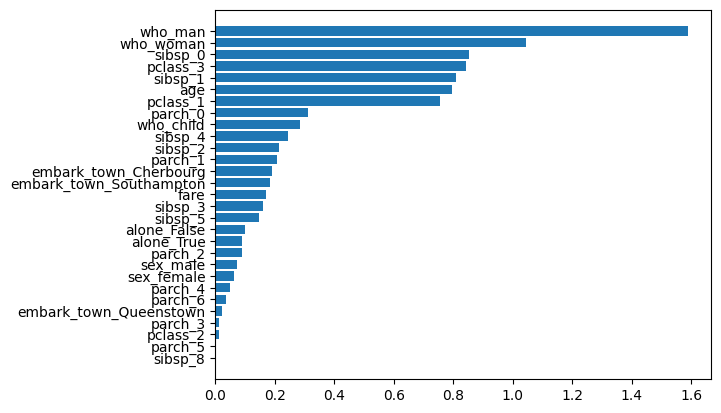

In [64]:
stdevs = []
for i in X_train.columns:
    stdev =X_train[i].std()
    stdevs.append(stdev)

features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"]
features['importance_standarized'] = features['importance'] / y_train.std()

features = features.sort_values('importance_standarized', ascending=True)
plt.barh(features.index, features.importance_standarized);

11. Procesa el dataset de Test para que puedas usarlo en la evaluación 

In [ ]:
#Se ha ido haciendo a la par que X_train

12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.

In [81]:
log_reg.predict(X_train)

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

In [82]:
log_reg.predict_proba(X_train)

array([[0.54457119, 0.45542881],
       [0.80534471, 0.19465529],
       [0.8956677 , 0.1043323 ],
       ...,
       [0.90751789, 0.09248211],
       [0.9116284 , 0.0883716 ],
       [0.65372789, 0.34627211]], shape=(624, 2))

In [83]:
y_proba = log_reg.predict_proba(X_test)
y_pred = log_reg.predict(X_test)

Accuracy

In [65]:
acc_train = round(accuracy_score(log_reg.predict(X_train), y_train), 3)
acc_test = round(accuracy_score(log_reg.predict(X_test), y_test), 3)

print("Accuracy train:", acc_train)
print("Accuracy test:", acc_test)

Accuracy train: 0.812
Accuracy test: 0.769


In [66]:
y_train.value_counts(True)

target
0    0.591346
1    0.408654
Name: proportion, dtype: float64

In [67]:
y_test.value_counts(True)

target
0    0.570513
1    0.429487
Name: proportion, dtype: float64

Accuracy
- Train: 0.812
- Test: 0.769

No hay sobreajuste grave. El modelo generaliza razonablemente bien


Distribución del target
- Train: 59% clase 0, 41% 
- Test: 57% clase 0, 43%

Las proporciones están equilibradas entre train y test, lo que valida la comparación


Confusion matrix

In [85]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[f"Real {i}" for i in log_reg.classes_], 
                  columns=[f"Predicho {i}" for i in log_reg.classes_])

cm

,Predicho 0,Predicho 1
Real 0,71,18
Real 1,18,49


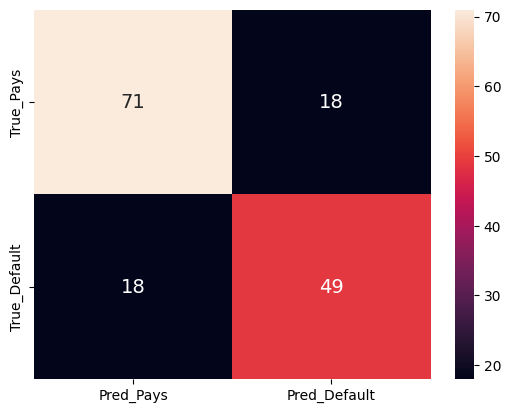

In [68]:
c_matrix = confusion_matrix(y_test, log_reg.predict(X_test))

c_matrix_df = pd.DataFrame(c_matrix, columns = ['Pred_Pays', 'Pred_Default'],
                          index = ['True_Pays', 'True_Default'])

sns.heatmap(c_matrix_df, annot=True, fmt='g');

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


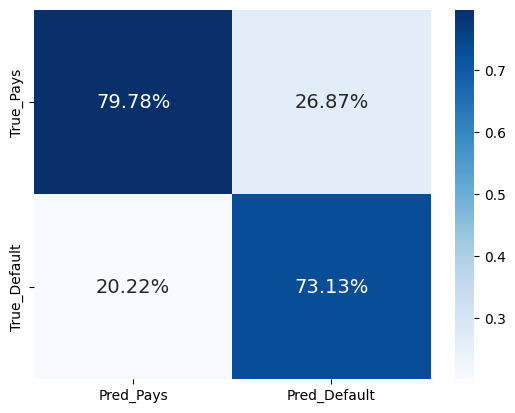

In [69]:
sns.heatmap(c_matrix_df/np.sum(c_matrix_df), annot=True, 
            fmt='.2%', cmap='Blues');

El modelo comete errores simétricos
- 18 falsos positivos
- 18 falsos negativos


Micro-Macro averages

In [91]:
micro_prec = precision_score(y_test, y_pred, average="micro")
print("MICRO PRECISION:", micro_prec)

macro_prec = precision_score(y_test, y_pred, average="macro")
print("MACRO PRECISION:", macro_prec)

micro_rec = recall_score(y_test, y_pred, average="micro")
print("MICRO RECALL:", micro_rec)

macro_rec = recall_score(y_test, y_pred, average="macro")
print("MACRO RECALL:", macro_rec)

micro_acc = accuracy_score(y_test, y_pred)
print("MICRO ACCURACY:", micro_acc)

MICRO PRECISION: 0.7692307692307693
MACRO PRECISION: 0.7645480462854268
MICRO RECALL: 0.7692307692307693
MACRO RECALL: 0.7645480462854268
MICRO ACCURACY: 0.7692307692307693


Classification rerpot

In [72]:
print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        89
           1       0.73      0.73      0.73        67

    accuracy                           0.77       156
   macro avg       0.76      0.76      0.76       156
weighted avg       0.77      0.77      0.77       156



- Buen balance entre precisión y recall
- La clase minoritaria (1) está bien representada
- F1-score general: 0.77


RoC Curve

AUROC: 0.87


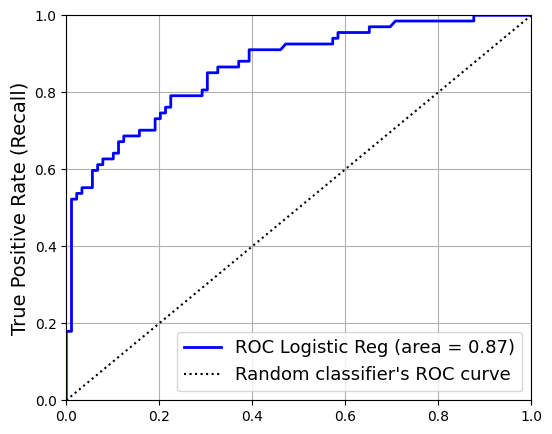

In [75]:
scores = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

AUROC: 0.87
- Muyy buena capacidad de discriminación
- El modelo distingue bien entre clases, incluso mejor que lo que su accuracy parecia


### Assessment de generabilidad:
- Generaliza bien: la diferencia entre train y test es pequeña
- Tiene buen balance entre clases
- No está sobreajustado
- Tiene una AUROC alta (0.87), lo que indica que aunque el accuracy no sea perfecto, el modelo sí sabe distinguir bien entre clases


Resumen
- Accuracy train: 81.2%
- Accuracy test: 76.9%
- Generaliza bien, sin sobreajuste
- AUROC: 0.87, buena capacidad de discriminación entre clases
- F1-score clase 1 (default): 0.73
- Buen equilibrio entre precisión y recall, incluso en la clase más difícil
- Matriz de confusión equilibrada
- Misma cantidad de falsos positivos y falsos negativos (18 cada uno), lo que indica que el modelo no está sesgado hacia una clase

